In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import probplot
from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests 

%matplotlib inline

In [3]:
df = pd.read_csv('_e5da3bbe4a9b1bdbfe17c402d05cbe63_ab_browser_test.csv')
df.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [4]:
exp_df = df[df['slot'] == 'exp']
control_df = df[df['slot'] == 'control']

In [5]:
round(((exp_df['n_clicks'].sum() / control_df['n_clicks'].sum() - 1) * 100), 3)

1.614

In [6]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (len(data), n_samples))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [7]:
np.random.seed(0)
control_mean = []
control_median = []
exp_mean = []
exp_median = []
for i in range(500):
    indices = np.random.randint(0, len(control_df['n_clicks']), (len(control_df['n_clicks']), 1))
    control_mean.append(np.mean(control_df['n_clicks'].values[indices]))
    control_median.append(np.median(control_df['n_clicks'].values[indices]))
    indices = np.random.randint(0, len(exp_df['n_clicks']), (len(exp_df['n_clicks']), 1))
    exp_mean.append(np.mean(exp_df['n_clicks'].values[indices]))
    exp_median.append(np.median(exp_df['n_clicks'].values[indices]))

In [8]:
stat_intervals(np.array(exp_median) - np.array(control_median), 0.05)

array([ 1.,  1.])

In [9]:
stat_intervals(np.array(exp_mean) - np.array(control_mean), 0.05)

array([ 0.19912903,  0.40245493])

In [10]:
np.random.seed(0)
control_mean = []
control_boot_chi_squared = []
for i in range(500):
    indices = np.random.randint(0, len(control_df['n_clicks']), (len(control_df['n_clicks']), 1))
    control_mean.append(np.mean(control_df['n_clicks'].values[indices]))
    control_boot_chi_squared.append(np.sum((control_df['n_clicks'].values[indices] - control_mean[-1]) ** 2))

0.99864166988203129

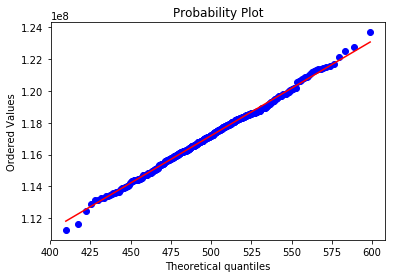

In [11]:
(_,_), (_,_,r) = probplot(np.array(control_boot_chi_squared), dist="chi2", sparams=(len(control_boot_chi_squared)-1), plot=plt)
r

0.99797483646042096

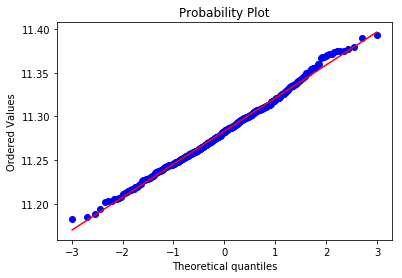

In [12]:
(_,_), (_,_,r) = probplot(np.array(control_mean), plot = plt)
r

In [13]:
control_clicks = control_df[['userID', 'n_clicks']].groupby(['userID']).sum()
exp_clicks = exp_df[['userID', 'n_clicks']].groupby(['userID']).sum()

In [14]:
control_clicks.shape, control_df.shape

((284392, 1), (284554, 6))

In [15]:
stats.mannwhitneyu(control_clicks.values, exp_clicks.values)

MannwhitneyuResult(statistic=38901259929.0, pvalue=4.3471471887604393e-75)

In [16]:
df.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [17]:
df['browser'].value_counts().index

Index(['Browser #4', 'Browser #22', 'Browser #2', 'Browser #14', 'Browser #20',
       'Browser #17'],
      dtype='object')

In [18]:
browser_list = []
for browser_id in df['browser'].value_counts().index:
    browser_list.append(df[df['browser'] == browser_id])

In [19]:
p_values = []
for browser_df in browser_list:
    control_clicks = browser_df[browser_df['slot'] == 'control'][['userID', 'n_clicks']].groupby(['userID']).sum()
    exp_clicks = browser_df[browser_df['slot'] == 'exp'][['userID', 'n_clicks']].groupby(['userID']).sum()
    p_values.append(stats.mannwhitneyu(control_clicks.values, exp_clicks.values)[1])

In [20]:
reject, p_corrected, a1, a2 = multipletests(p_values, 
                                            alpha = 0.05, 
                                            method = 'bonferroni') 

In [21]:
p_values

[0.40760617658454984,
 0.25740551522100319,
 0.027243860419724101,
 0.0,
 0.45366656388735377,
 0.037400601430108017]

In [22]:
reject

array([False, False, False,  True, False, False], dtype=bool)

In [23]:
control_non_share = []
exp_non_share = []
for browser_df in browser_list:
    control_browser = browser_df[browser_df['slot'] == 'control']
    exp_browser = browser_df[browser_df['slot'] == 'exp']
    control_non_share.append(control_browser['n_nonclk_queries'].sum() / control_browser['n_queries'].sum())
    exp_non_share.append(exp_browser['n_nonclk_queries'].sum() / exp_browser['n_queries'].sum())

In [24]:
np.array(control_non_share) - np.array(exp_non_share)

array([ 0.01827988,  0.00740029,  0.0098    ,  0.13834794,  0.01563108,
       -0.00638046])

In [25]:
control_non_share

[0.4697092963514274,
 0.40593976593513353,
 0.4596274717919465,
 0.5759041136008114,
 0.4054048474338329,
 0.36299366746282086]

In [26]:
exp_non_share

[0.4514294190358467,
 0.3985394721969546,
 0.449827469485547,
 0.4375561736127329,
 0.3897737648371716,
 0.3693741284866483]

In [7]:
indices = np.random.randint(0, len(), (len(control_df['n_clicks']), 1))

In [11]:
control_df['n_clicks'].values

array([12,  4, 22, ...,  1,  0,  2], dtype=int64)

## 2 7